In [4]:
import pandas as pd

df = pd.read_csv("train.csv")


In [6]:
df.head()
df.shape
df.info()
df.describe()

df['price_range'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [7]:

df.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:

df.select_dtypes(include='object').columns


Index([], dtype='object')

In [9]:
import numpy as np
from scipy import stats

features = df.columns.drop('price_range')


for col in features:
    print(f"\n--- {col} ---")
    print("Mean:", np.mean(df[col]))
    print("Median:", np.median(df[col]))
    print("Mode:", stats.mode(df[col], keepdims=True)[0][0])
    print("Variance:", np.var(df[col]))
    print("Standard Deviation:", np.std(df[col]))
    print("Skewness:", stats.skew(df[col]))
    print("Kurtosis:", stats.kurtosis(df[col]))



--- battery_power ---
Mean: 1238.5185
Median: 1226.0
Mode: 618
Variance: 192991.81565775
Standard Deviation: 439.3083377967575
Skewness: 0.03187454295305568
Kurtosis: -1.224084165725428

--- blue ---
Mean: 0.495
Median: 0.0
Mode: 0
Variance: 0.24997499999999997
Standard Deviation: 0.4999749993749687
Skewness: 0.02000100007500624
Kurtosis: -1.9995999599959997

--- clock_speed ---
Mean: 1.52225
Median: 1.5
Mode: 0.5
Variance: 0.6655299375
Standard Deviation: 0.8158001823363366
Skewness: 0.17795052935349268
Kurtosis: -1.3231094949498647

--- dual_sim ---
Mean: 0.5095
Median: 1.0
Mode: 1
Variance: 0.24990975
Standard Deviation: 0.499909741853467
Skewness: -0.03800686085763292
Kurtosis: -1.9985554785277484

--- fc ---
Mean: 4.3095
Median: 3.0
Mode: 0
Variance: 18.838709749999996
Standard Deviation: 4.340358251342854
Skewness: 1.0190463925723268
Kurtosis: 0.27338561771466496

--- four_g ---
Mean: 0.5215
Median: 1.0
Mode: 1
Variance: 0.24953775000000003
Standard Deviation: 0.4995375361271663

In [10]:

low = df[df['price_range'] == 0]['ram']
high = df[df['price_range'] == 3]['ram']


t_stat, p_val = stats.ttest_ind(low, high)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: -111.37307717748769, P-value: 0.0


In [11]:

correlations = df.corr()['price_range'].sort_values(ascending=False)
print(correlations)


price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


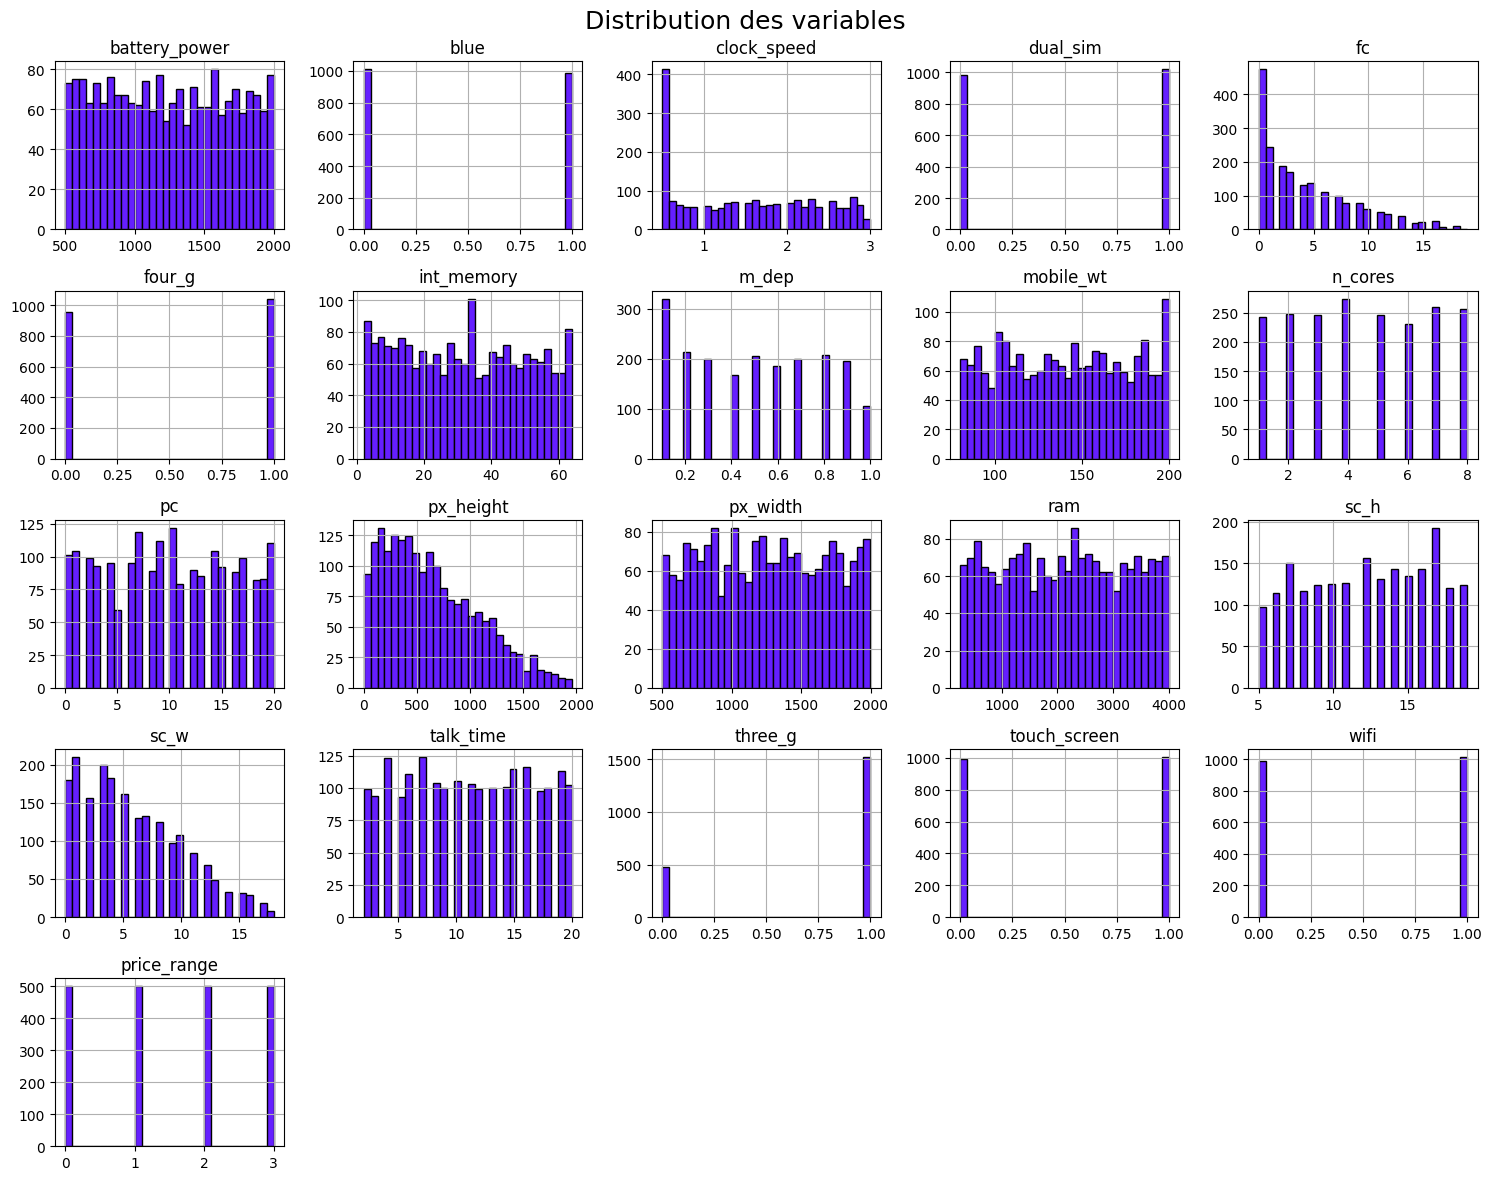

In [12]:
import matplotlib.pyplot as plt


df.hist(figsize=(15, 12), bins=30, color="#651FFF", edgecolor='black')
plt.suptitle("Distribution des variables", fontsize=18)
plt.tight_layout()
plt.show()


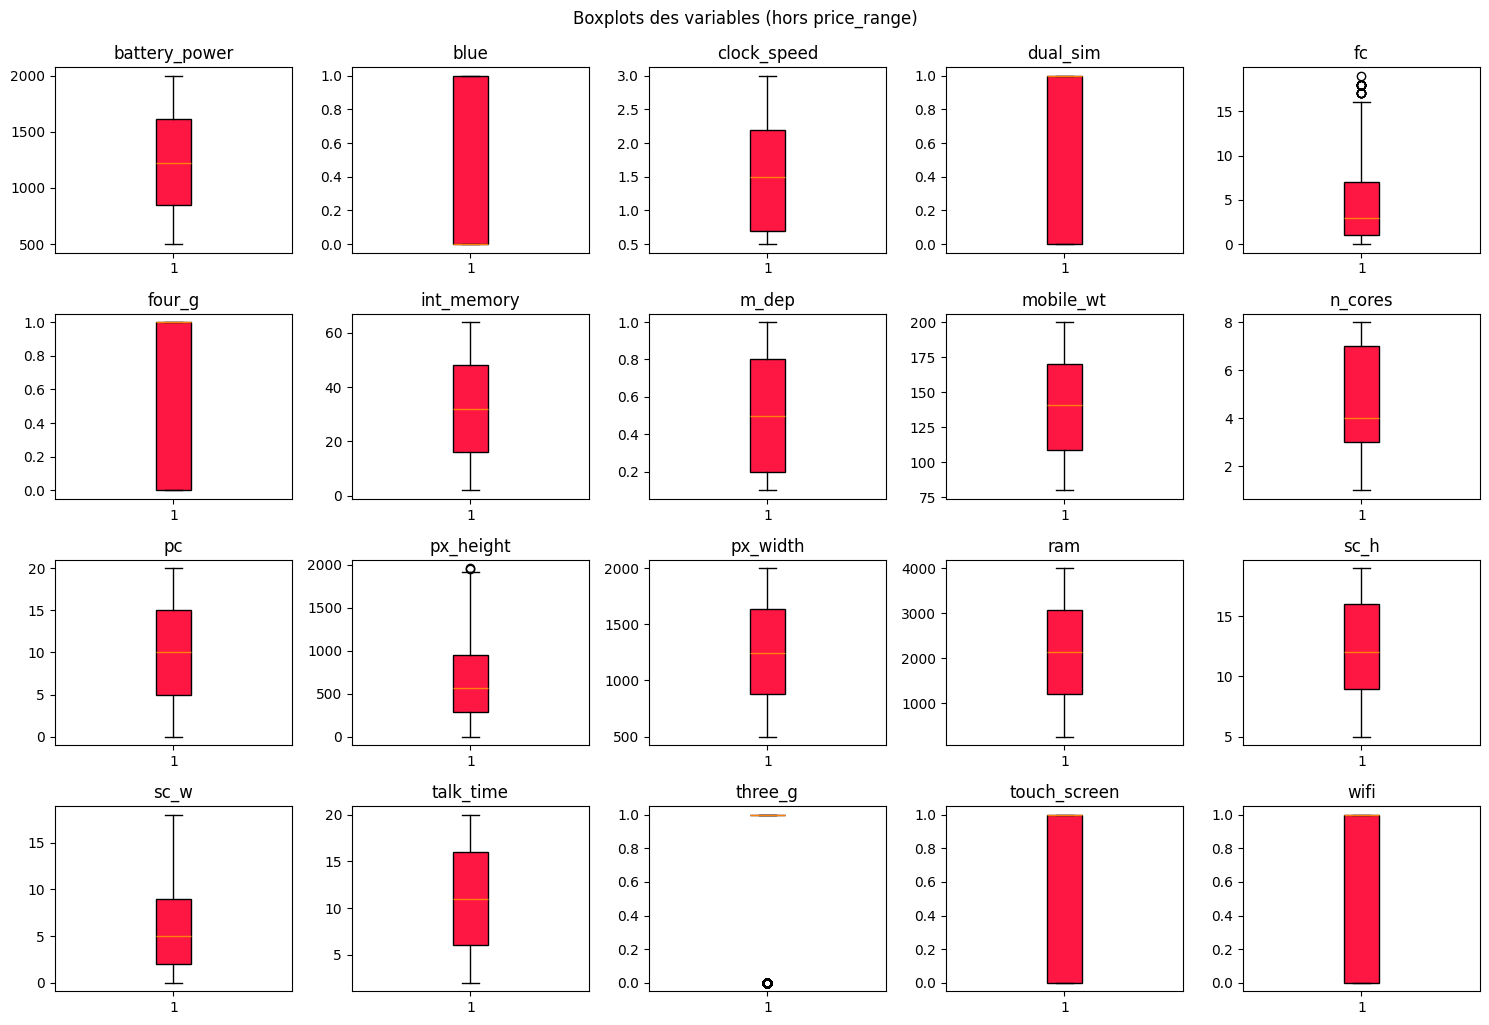

In [13]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 5, i+1)
    plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor="#FF1744"))
    plt.title(col)
plt.tight_layout()
plt.suptitle("Boxplots des variables (hors price_range)", y=1.02)
plt.show()


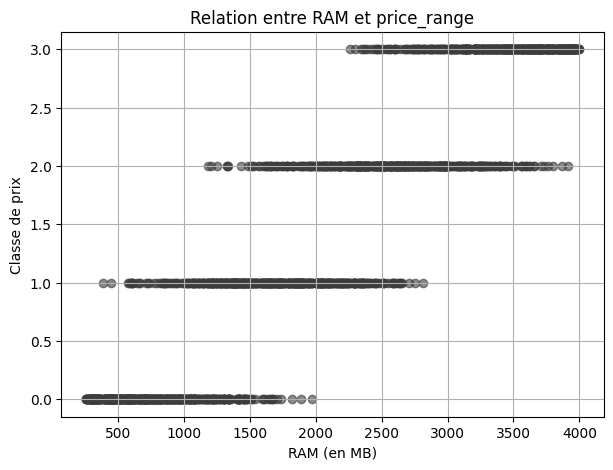

In [14]:
plt.figure(figsize=(7, 5))
plt.scatter(df['ram'], df['price_range'], alpha=0.6, color="#3C3C3C")
plt.title("Relation entre RAM et price_range")
plt.xlabel("RAM (en MB)")
plt.ylabel("Classe de prix")
plt.grid(True)
plt.show()


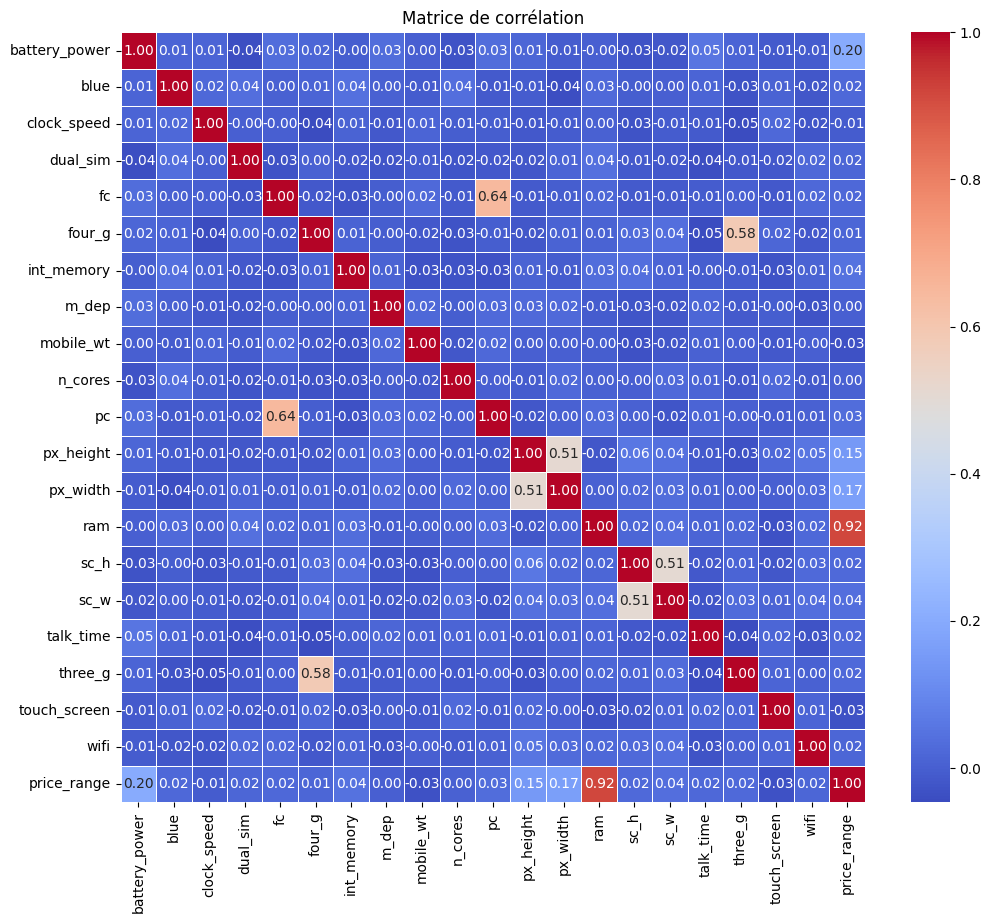

In [15]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
!git add . 
!git commit -m "Analyse exploratoire des données"
!git push origin main